<a href="https://colab.research.google.com/github/gbiamgaurav/Feature-Engineering/blob/main/Missing_Values_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What are the different types of Missing Data ? 

* `Missing Completely at Random (MCAR)` :-

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
url = "https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv"

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
### Check missing values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
### check the type & meta-data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


`* Missing Data Not At Random(MNAR)` :- 

Systematic missing Values ! There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [13]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(), 1,0)

### Find the percentage of null-values
df['Cabin_null'].mean()*100

77.10437710437711

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [16]:
df.Cabin_null.isnull().sum()

0

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [18]:
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int64

In [19]:
df.groupby(['Survived'])['Cabin']

In [21]:
df.groupby(['Survived'])['Cabin_null'].mean()*100

Survived
0    87.613843
1    60.233918
Name: Cabin_null, dtype: float64

`* Missing at Random (MAR)` 

The Probability of MAR will be the same in the dataset.



### Techniques by which we can handle the missing values

* `Mean/Median/Mode replacement`
* `Random Sample Imputation`
* `Capturing NAN values with a new feature`
* `End of Distribution imputation`
* `Arbitary imputation`
* `Frequent categories imputation`

`Mean/Median/Mode Replacement`

When should we apply ?

Mean/Median/Mode imputation has the assumption that the data are missing completely at random(MCAR). Solve this by replacing the NAN with the most frequent occurance of the variables.

In [22]:
df = pd.read_csv(url, usecols=['Age', 'Fare', 'Survived'])

In [23]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
### let's see the percentage of missing values
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [25]:
def impute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)

In [26]:
median = df.Age.median()

In [27]:
median

28.0

In [28]:
impute_nan(df,'Age',median)

In [29]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [32]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

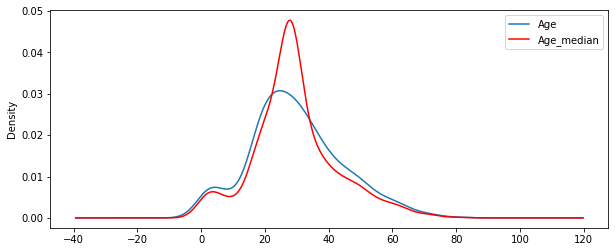

In [40]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

Advantages and Disadvantages of Mean / Median Imputations :-

`Advantages` 🆗
* Easy to implement (Robust to Outliers)
* Faster way to obtain the complete dataset

`Disadvantages` 🆗
* Change or Distortion in the original variance
* Impacts Correlation

In [41]:
df_corr = df.corr()

In [42]:
df_corr

,Survived,Age,Fare,Age_median
Survived,1.000000,-0.077221,0.257307,-0.064910
Age,-0.077221,1.000000,0.096067,1.000000
Fare,0.257307,0.096067,1.000000,0.096688
Age_median,-0.064910,1.000000,0.096688,1.000000


In [43]:
import seaborn as sns

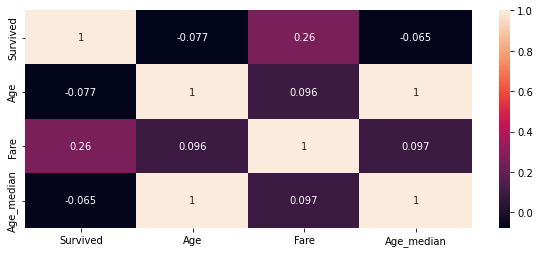

In [44]:
plt.figure(figsize=(10,4))
sns.heatmap(df_corr, annot=True)